In [23]:
library(tidymodels)
library(tidyverse)
library(caret)
library(class)
library(scales)

In [24]:
heart <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
tail(heart)

New names:
* `1.0` -> `1.0...2`
* `1.0` -> `1.0...3`
* `1.0` -> `1.0...6`
* `0.0` -> `0.0...9`
* `0.0` -> `0.0...12`

Rows: 302 Columns: 14

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [25]:
#finding elements w 
idx <- heart == "?"
is.na(heart) <- idx

as.data.frame(heart)
rownames(heart) <- paste("patient", 1:302, sep="") 
colnames(heart) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
#changing 1,2,3,4 to 100 for indicating presence of heart disease
heart$num <- as.character(heart$num)
heart$num[heart$num == "1"] <- "100"
heart$num <- as.character(heart$num)
heart$num[heart$num == "2"] <- "100"
heart$num <- as.character(heart$num)
heart$num[heart$num == "3"] <- "100"
heart$num <- as.character(heart$num)
heart$num[heart$num == "4"] <- "100"

na.omit(heart)

63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


Warning message:
“Setting row names on a tibble is deprecated.”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,100
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,100
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,100
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,100
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,100


In [26]:
#setting seed
set.seed(1234)
heart_split <- initial_split(heart, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)


In [27]:
pca_heart <- heart_train %>%
select(where(is.numeric)) %>%
scale() %>%
prcomp()

pca_heart

Standard deviations (1, .., p=11):
 [1] 1.6375280 1.2588325 1.1221749 0.9861699 0.9611657 0.8970034 0.8772604
 [8] 0.7971514 0.7412211 0.6733971 0.6047080

Rotation (n x k) = (11 x 11):
                 PC1         PC2         PC3         PC4         PC5
age       0.31178765 -0.40680272  0.01871133 -0.14560730  0.22754212
sex       0.06804089  0.32579272 -0.52495330  0.41025290  0.07580892
cp        0.29086159  0.28187842  0.41293722  0.21633627  0.15758580
trestbps  0.20592173 -0.50424606 -0.21090756 -0.11170253 -0.04537683
chol      0.12785322 -0.37513834  0.46812824  0.26164555  0.14581968
fbs       0.00518269 -0.30279434 -0.42172078  0.41133547  0.47642353
restecg   0.18117126 -0.20715287  0.05746603  0.58456815 -0.68634181
thalach  -0.45313655 -0.07131384 -0.04054333  0.09906953 -0.20921847
exang     0.37059226  0.32262214  0.13311652  0.22726545  0.22939797
oldpeak   0.44396217  0.06472153 -0.18657437 -0.26427784 -0.16992996
slope     0.42683085  0.07724008 -0.23367968 -0.2013204

Standard deviations (1, .., p=11):
 [1] 1.6375280 1.2588325 1.1221749 0.9861699 0.9611657 0.8970034 0.8772604
 [8] 0.7971514 0.7412211 0.6733971 0.6047080

Rotation (n x k) = (11 x 11):
                 PC1         PC2         PC3         PC4         PC5
age       0.31178765 -0.40680272  0.01871133 -0.14560730  0.22754212
sex       0.06804089  0.32579272 -0.52495330  0.41025290  0.07580892
cp        0.29086159  0.28187842  0.41293722  0.21633627  0.15758580
trestbps  0.20592173 -0.50424606 -0.21090756 -0.11170253 -0.04537683
chol      0.12785322 -0.37513834  0.46812824  0.26164555  0.14581968
fbs       0.00518269 -0.30279434 -0.42172078  0.41133547  0.47642353
restecg   0.18117126 -0.20715287  0.05746603  0.58456815 -0.68634181
thalach  -0.45313655 -0.07131384 -0.04054333  0.09906953 -0.20921847
exang     0.37059226  0.32262214  0.13311652  0.22726545  0.22939797
oldpeak   0.44396217  0.06472153 -0.18657437 -0.26427784 -0.16992996
slope     0.42683085  0.07724008 -0.23367968 -0.2013204

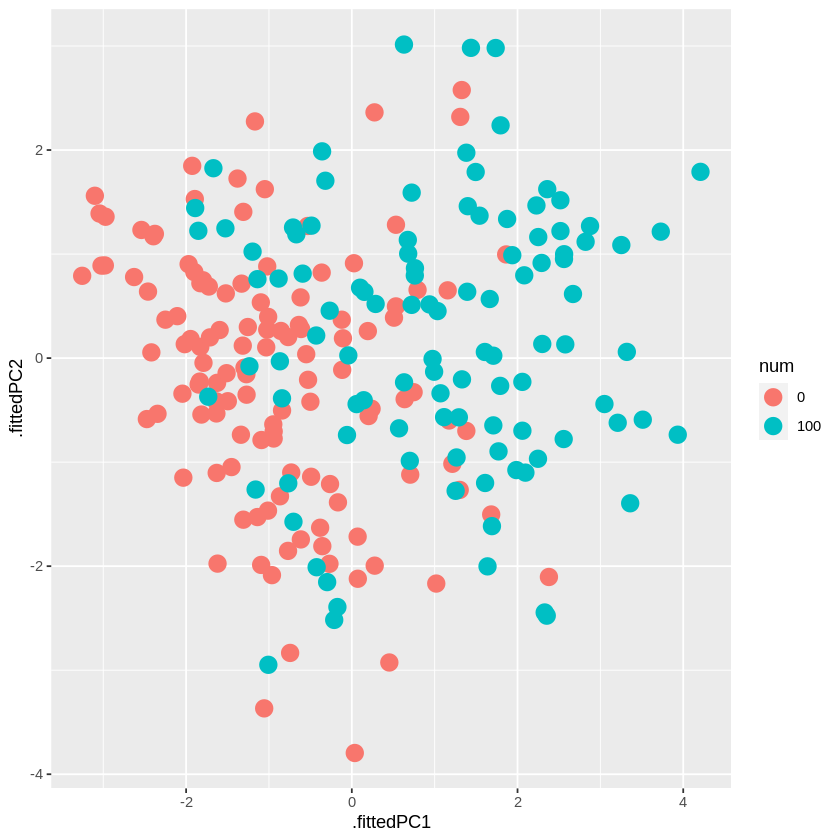

In [28]:
##plotting PC coordinates
pca_heart %>%
augment(heart_train) %>% ### this adds previous dataset (before doing PCA) to the PCA dataset. 
                   ##This is done for simplicity so we can color the points according to the original variables for each vector
ggplot(aes(x= .fittedPC1, y= .fittedPC2, color = num)) + 
geom_point(size = 4.5)
pca_heart


PC,std.dev,percent,cumulative
<dbl>,<dbl>,<dbl>,<dbl>
1,1.6375280,0.24377,0.24377
2,1.2588325,0.14406,0.38783
3,1.1221749,0.11448,0.50231
4,0.9861699,0.08841,0.59072
5,0.9611657,0.08399,0.67471
6,0.8970034,0.07315,0.74786
7,0.8772604,0.06996,0.81782
8,0.7971514,0.05777,0.87559
9,0.7412211,0.04995,0.92553


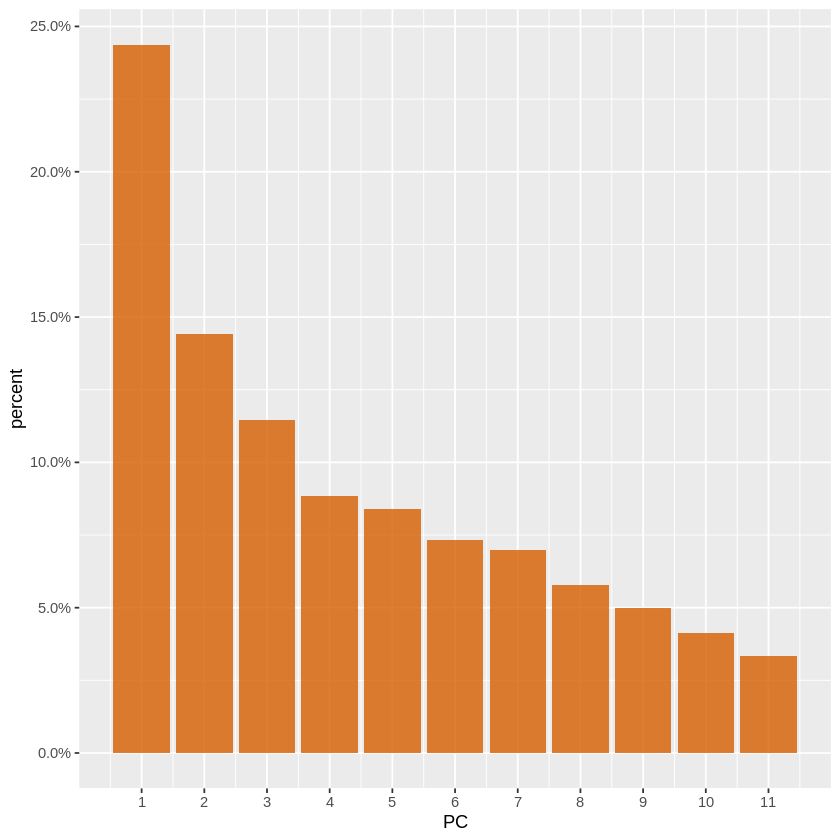

In [29]:
###plotting a scree plot to show the variance of each individual principle component

pca_heart %>%
tidy(matrix = "eigenvalues")

pca_heart %>% 
tidy(matrix = "eigenvalues") %>%
ggplot(aes(PC, percent)) + 
geom_col(fill = "#D55E00", alpha = 0.8) +
scale_x_continuous(breaks = 1:12) +
scale_y_continuous(labels = scales::percent_format())


In [30]:
### getting eigenvalues of different vectors


In [31]:
### preprocessing for knn
##"age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"
###"age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal",

heart_recipe <- recipe(num ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope, data=heart_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

heart_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor         11

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [32]:
### train model 
set.seed(1234)
heart_knn <- train(num ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope, data = heart_train, method = "knn", tuneGrid= data.frame(k=3))
summary(heart_knn)








            Length Class      Mode     
learn        2     -none-     list     
k            1     -none-     numeric  
theDots      0     -none-     list     
xNames      11     -none-     character
problemType  1     -none-     character
tuneValue    1     data.frame list     
obsLevels    2     -none-     character
param        0     -none-     list     

In [33]:
##knn spec for classifcation where k=3

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
set_engine("kknn") %>%
set_mode("classification")

##fit knn model 
knn_fit <- workflow() %>%
add_recipe(heart_recipe) %>%
add_model(knn_spec) %>%
fit(data = heart_train)

##get predictions on validated data

heart_test_predictions <- predict(knn_fit, heart_test) %>%
bind_cols(heart_test)

heart_test_predictions

test_data = heart_test
heart_test$predict <- predict(heart_knn, newdata=test_data, interval="confidence")
confusionMatrix(data=factor(heart_test$predict), reference=factor(heart_test$num))

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
100,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
100,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,100
0,57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0
0,44,1,2,120,263,0,0,173,0,0.0,1,0.0,7.0,0
0,49,1,2,130,266,0,0,171,0,0.6,1,0.0,3.0,0
0,64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0
100,58,1,3,132,224,0,2,173,0,3.2,1,2.0,7.0,100
0,50,0,3,120,219,0,0,158,0,1.6,2,0.0,3.0,0
0,43,1,4,150,247,0,0,171,0,1.5,1,0.0,3.0,0


Confusion Matrix and Statistics

          Reference
Prediction  0 100
       0   26  19
       100 15  16
                                          
               Accuracy : 0.5526          
                 95% CI : (0.4341, 0.6669)
    No Information Rate : 0.5395          
    P-Value [Acc > NIR] : 0.4554          
                                          
                  Kappa : 0.0921          
                                          
 Mcnemar's Test P-Value : 0.6069          
                                          
            Sensitivity : 0.6341          
            Specificity : 0.4571          
         Pos Pred Value : 0.5778          
         Neg Pred Value : 0.5161          
             Prevalence : 0.5395          
         Detection Rate : 0.3421          
   Detection Prevalence : 0.5921          
      Balanced Accuracy : 0.5456          
                                          
       'Positive' Class : 0               
                                 

In [34]:

### choosing K by creating validating set

heart_split <- initial_split(heart_train, prop = 0.75, strat = num)
heart_subtrain <- training(heart_split)
heart_validation <- testing(heart_split)

#recipe

heart_recipe <- recipe(num ~ age + sex+ cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope, data=heart_subtrain) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

##training model for validation 

set.seed(1234)
sub_knn <- train(num ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope, data = heart_subtrain, method = "knn", tuneGrid= data.frame(k=3))
summary(sub_knn)

##knn spec for classifcation where k=3

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
set_engine("kknn") %>%
set_mode("classification")

##fit knn model 
knn_fit <- workflow() %>%
add_recipe(heart_recipe) %>%
add_model(knn_spec) %>%
fit(data = heart_subtrain)

##get predictions on validated data

validation_predicted <- predict(knn_fit, heart_validation) %>%
bind_cols(heart_validation)

validation_predicted

##compute accuracy

confusionMatrix <- validation_predicted %>%
conf_mat(truth=num, estimate= .pred_class)

confusionMatrix

val_data = heart_validation
heart_validation$predict <- predict(sub_knn, newdata=val_data, interval="confidence")
confusionMatrix(data=factor(heart_validation$predict), reference=factor(heart_validation$num))




            Length Class      Mode     
learn        2     -none-     list     
k            1     -none-     numeric  
theDots      0     -none-     list     
xNames      11     -none-     character
problemType  1     -none-     character
tuneValue    1     data.frame list     
obsLevels    2     -none-     character
param        0     -none-     list     

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
0,56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
0,52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0
0,58,0,3,120,340,0,0,172,0,0.0,1,0.0,3.0,0
0,69,0,1,140,239,0,0,151,0,1.8,1,2.0,3.0,0
0,71,0,2,160,302,0,0,162,0,0.4,1,2.0,3.0,0
0,44,1,2,130,219,0,2,188,0,0.0,1,0.0,3.0,0
0,46,0,3,142,177,0,2,160,1,1.4,3,0.0,3.0,0
0,48,1,2,130,245,0,2,180,0,0.2,2,0.0,3.0,0


Warning message in vec2table(truth = truth, estimate = estimate, dnn = dnn, ...):
“`truth` was converted to a factor”


          Truth
Prediction  0 100
       0   26   4
       100  5  22

Confusion Matrix and Statistics

          Reference
Prediction  0 100
       0   23   9
       100  8  17
                                         
               Accuracy : 0.7018         
                 95% CI : (0.566, 0.8157)
    No Information Rate : 0.5439         
    P-Value [Acc > NIR] : 0.01096        
                                         
                  Kappa : 0.397          
                                         
 Mcnemar's Test P-Value : 1.00000        
                                         
            Sensitivity : 0.7419         
            Specificity : 0.6538         
         Pos Pred Value : 0.7188         
         Neg Pred Value : 0.6800         
             Prevalence : 0.5439         
         Detection Rate : 0.4035         
   Detection Prevalence : 0.5614         
      Balanced Accuracy : 0.6979         
                                         
       'Positive' Class : 0              
                                         

In [35]:
##cross validation

heart_vfold = vfold_cv(heart_train, v= 10, strata = num)

heart_vfold

splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [36]:
heart_recipe <- recipe(num ~ age + sex+ cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope, data=heart_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

knn_fit <- workflow() %>%
add_recipe(heart_recipe) %>%
add_model(knn_spec) %>%
fit_resamples(resamples=heart_vfold)

knn_fit

splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [37]:
##collecting metrics to see std error and mean

knn_fit %>%
collect_metrics()

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.7886858,10,0.02722904,Preprocessor1_Model1
roc_auc,binary,0.8490472,10,0.02285991,Preprocessor1_Model1


In [38]:
### choosing K instead of using k=3

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
set_engine("kknn") %>%
set_mode("classification")

In [39]:
##running kvalues from 1to 100
k_vals <- tibble(neighbors=seq(from=1, to=100,by=5))

knn_results <- workflow() %>%
add_recipe(heart_recipe) %>%
add_model(knn_spec) %>%
tune_grid(resamples= heart_vfold, grid= k_vals) %>%
collect_metrics()

accuracies <- knn_results %>%
filter(.metric == "accuracy")

accuracies



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7161891,10,0.01301543,Preprocessor1_Model01
6,accuracy,binary,0.7750659,10,0.02613079,Preprocessor1_Model02
11,accuracy,binary,0.7932477,10,0.02007895,Preprocessor1_Model03
16,accuracy,binary,0.7934453,10,0.02397689,Preprocessor1_Model04
21,accuracy,binary,0.7976120,10,0.02742736,Preprocessor1_Model05
26,accuracy,binary,0.7974308,10,0.02257165,Preprocessor1_Model06
31,accuracy,binary,0.7932642,10,0.02366425,Preprocessor1_Model07
36,accuracy,binary,0.7928854,10,0.01815023,Preprocessor1_Model08
41,accuracy,binary,0.7839756,10,0.01755943,Preprocessor1_Model09


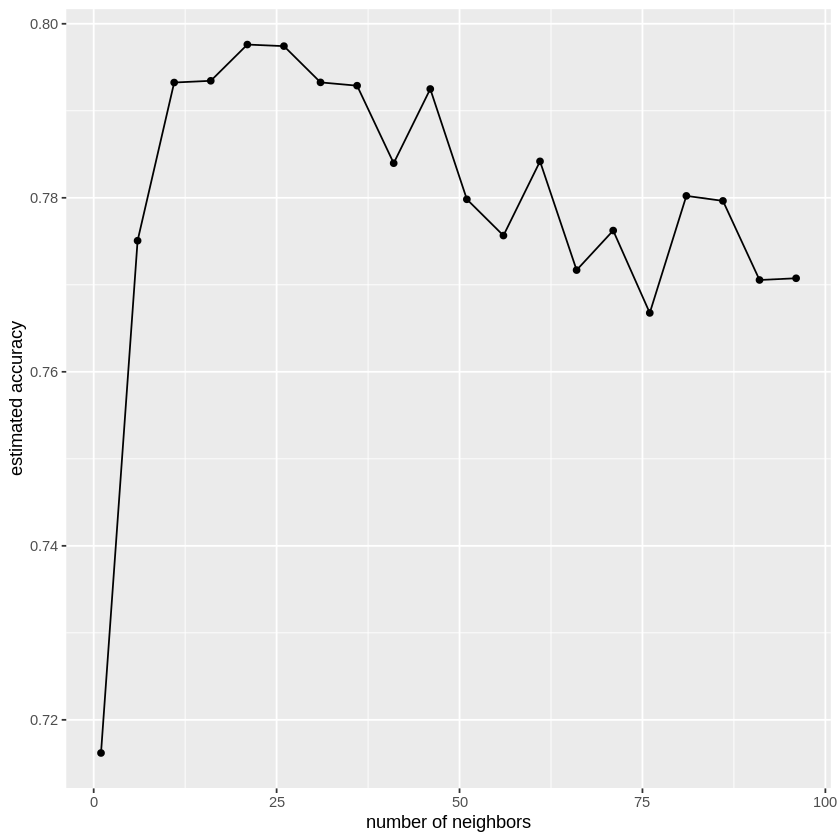

In [40]:
## plot k to get an elbow plot

accuracy_vs_k <- ggplot(accuracies, aes(x=neighbors, y= mean)) +
geom_point() +
geom_line() +
labs(x= "number of neighbors", y= "estimated accuracy")

accuracy_vs_k

In [47]:
## using k=21 from elbow plot w/ ~79% accuracy
set.seed(1234)
please_work <- train(num ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope, data = heart_train, method = "knn", tuneGrid= data.frame(k=21))
summary(please_work)


            Length Class      Mode     
learn        2     -none-     list     
k            1     -none-     numeric  
theDots      0     -none-     list     
xNames      11     -none-     character
problemType  1     -none-     character
tuneValue    1     data.frame list     
obsLevels    2     -none-     character
param        0     -none-     list     

In [45]:
new_obs <- tibble(age=c(45.0), sex=c(1.0), cp=c(4.0), trestbps=c(120.0), chol=c(210.0), fbs=c(1.0), restecg=c(0.0), 
                  thalach=c(160.0), exang= c(0.0), oldpeak= c(3.0), slope=c(2.0), ca=c(0.0), thal=c(3.0))

###sex= 1.0 for male, 0.0 for female
###cp=1 for typical angina, 2 for atypical angina, 3 for non-anginal pain, 4 for no symptoms of anginal pain
###trestbps is resting systolic blood pressure 
###fbs=1.0 when fasting blood sugar is >120 mg/dl; 0 otherwise
###restecg where 0= normal, 1= ST-T abnormality (inversion), 2= probable/definite left ventricular hypertrophy (Estes' criteria)
##thalach is max heart rate achieved in beats/min
###exang is exercise induced angina (1= yes, 0=no)
###oldpeak = ST depression induced by exercise relative to rest
###slope = slope of peak exercise ST segment, 1= upsloping, 2= flat, 3= downsloping
###ca= # of major vessels colored by fluoroscopy (0-3)
### thal is thalassemia where 3= normal, 6= fixed defect, 7= reversable defect

prediction <- predict(please_work, new_obs)
prediction
## outcome = num where num: diagnosis of heart disease (angiographic disease status)
### 0 is <50% diameter narrowing of any major vessels
### 100 is >50% diameter narrowing of any major vessels 



[1] 0
Levels: 0 100

In [46]:
### values obtained from a real case: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6263468/)

dont_embarrass_me <- tibble(age=c(67.0), sex=c(0.0), cp=c(1.0), trestbps=c(100.0), chol=c(228.0), fbs=c(120.0), 
                            restecg=c(1.0), thalach=c(100.0), exang= c(1.0), oldpeak= c(3.0), slope=c(1.0), ca=c(2.0), 
                            thal=c(3.0))


prediction <- predict(please_work, dont_embarrass_me)
prediction

[1] 100
Levels: 0 100